## NumerAi Tournament 64

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function that returns the Cross-Validation log_loss score
def get_log_loss(grid_search_obj):
    print("Best log_loss score: {:.5f}".format(-1 * grid_search_obj.best_score_))

In [3]:
# Function that uses RandomForest to return most important features
def rf_feature_selection(df, X, y):
    # Create a random forest
    from sklearn.ensemble import RandomForestClassifier

    # Get the columns
    cols = df.columns[3:-1]

    # Make the forest
    forest = RandomForestClassifier(n_estimators=100, n_jobs=2)

    # Fit
    forest.fit(X,y)

    # Get the importances
    importances = forest.feature_importances_

    # Get the indices
    indices = np.argsort(importances)[::-1]

    # Show the importance of each feature
    for f in range(X.shape[1]):
        print("{} - {}".format(cols[f], importances[indices[f]]))

In [4]:
# Function that takes the probabilities and ids and saves them to a CSV file
def save_predictions(probabilities, tourney_df, tournament_nbr=60):
    import pandas as pd
    
    # Get the probability of 1
    prob_of_one = probabilities[:, 1]
    
    # Get the IDs
    ids = tourney_df['id']
    
    # Join the data into one DataFrame
    results = pd.DataFrame(data={'probability': prob_of_one})
    results = pd.DataFrame(ids).join(results)
    
    # Save to CSV
    results.to_csv("probabilities_{}.csv".format(tournament_nbr), index=False)

In [5]:
# Load the data
# File path
train_path = '/Users/taylordye/Desktop/numerai_datasets (64)/numerai_training_data.csv'
train_df = pd.read_csv(train_path)

train_df.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,44885,era1,train,0.48082,0.50443,0.64472,0.42563,0.36493,0.43412,0.59584,...,0.38062,0.69552,0.60017,0.36811,0.61011,0.64667,0.57433,0.49981,0.45062,0
1,128624,era1,train,0.29881,0.48132,0.74775,0.35139,0.34590,0.59582,0.47218,...,0.25399,0.69524,0.54931,0.24025,0.73879,0.74283,0.46221,0.61501,0.44855,0
2,25226,era1,train,0.35476,0.55320,0.72901,0.41842,0.30004,0.50967,0.58637,...,0.28310,0.76956,0.64866,0.29443,0.70038,0.72421,0.53198,0.51801,0.38804,1
3,138157,era1,train,0.54332,0.56586,0.46714,0.54309,0.59467,0.63145,0.33568,...,0.53332,0.43072,0.36848,0.49746,0.47296,0.46845,0.39342,0.49214,0.39743,0
4,42442,era1,train,0.48893,0.54007,0.63199,0.46102,0.38900,0.50775,0.60127,...,0.39956,0.70195,0.67195,0.34842,0.59658,0.62032,0.64752,0.45098,0.40611,0


In [6]:
# Load the tournement data
test_path = '/Users/taylordye/Desktop/numerai_datasets (64)/numerai_tournament_data.csv'
tournament_df = pd.read_csv(test_path)
tournament_df.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,32641,era97,validation,0.58228,0.54408,0.55255,0.52687,0.43723,0.46248,0.58303,...,0.48595,0.62503,0.59926,0.44971,0.51328,0.54355,0.61496,0.41511,0.41690,1.0
1,112348,era97,validation,0.24601,0.46172,0.78136,0.34749,0.35130,0.78562,0.40121,...,0.22749,0.65565,0.49220,0.21399,0.77513,0.76388,0.39902,0.66931,0.48594,1.0
2,25272,era97,validation,0.50668,0.44722,0.67618,0.41700,0.31515,0.40566,0.64946,...,0.37291,0.71875,0.61336,0.36777,0.62277,0.67088,0.61643,0.50787,0.51601,0.0
3,18968,era97,validation,0.50636,0.63478,0.55046,0.52136,0.47339,0.61386,0.52536,...,0.46061,0.62701,0.60301,0.42185,0.53153,0.54761,0.54812,0.42510,0.33908,0.0
4,64575,era97,validation,0.50030,0.48170,0.61656,0.45264,0.40540,0.42670,0.53949,...,0.41007,0.63426,0.55306,0.38399,0.58814,0.61208,0.56083,0.49818,0.45500,0.0


### Exploring the data

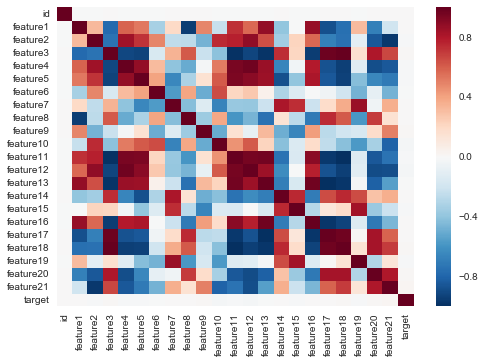

In [7]:
# Explore the correlations in the data
sns.heatmap(train_df.corr());

Looks like we have some features that highly correlate with each other.
May need to perform dimensionality reduction

In [30]:
# What do the important features looks like?
rf_feature_selection(train_df, X, y)

feature1 - 0.05414557358560525
feature2 - 0.05107893549430734
feature3 - 0.05023687998849231
feature4 - 0.04984222205975176
feature5 - 0.049275373046446386
feature6 - 0.04926631275318675
feature7 - 0.049184145229791046
feature8 - 0.04861187307661515
feature9 - 0.0476492105892047
feature10 - 0.04756353132358724
feature11 - 0.0475326174641803
feature12 - 0.04735224313220278
feature13 - 0.047194286701537844
feature14 - 0.04703257178043567
feature15 - 0.04607286018401819
feature16 - 0.04552661866044762
feature17 - 0.04538663982923717
feature18 - 0.044478694216021665
feature19 - 0.04446599994344927
feature20 - 0.044153865503747766
feature21 - 0.04394954543773376


#### Modelling the Data

In [8]:
# Get the numeric data
X = train_df.loc[:, 'feature1':'feature21'].values
y = train_df.loc[:, 'target'].values

X_test = tournament_df.loc[:, 'feature1':'feature21'].values

In [9]:
# We'll need Pipeline and other tools for the various models we'll try
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

Tried and true.. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# Create the Pipeline
logit_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('pca', PCA(n_components=3)),
                           ('logit', LogisticRegression(solver='sag', n_jobs=2,
                                                       C=0.01))])

In [29]:
# Cross-validate how well our model could do
logit_pipe_log_score = cross_val_score(estimator=logit_pipeline, X=X, y=y,
                                      cv=3, scoring='neg_log_loss')

In [30]:
# Print the score
print("Avg log_loss: {:.5f} (+/-) {:.5f}".format((np.mean(-1*logit_pipe_log_score)),
                                                np.std(logit_pipe_log_score)))

Avg log_loss: 0.69295 (+/-) 0.00005


In [22]:
# Get the best model and make predictions on the new data
save_predictions((logit_pipe_gs.fit(X, y).predict_proba(X_test)),
                tournament_df, tournament_nbr=64)

Let's try the StochasticGradientClassifier

In [19]:
from sklearn.linear_model import SGDClassifier

# Make the SGDC pipeline
sgdc_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                     ('sgdc', SGDClassifier(loss='log', n_jobs=2))])

In [20]:
# Cross validate
# Cross-validate how well our model could do
sgdc_pipe_score = cross_val_score(estimator=sgdc_pipe, X=X, y=y,
                                      cv=3, scoring='neg_log_loss')

In [21]:
# Print the score
print("Avg log_loss: {:.5f} (+/-) {:.5f}".format((np.mean(-1*sgdc_pipe_score)),
                                                np.std(sgdc_pipe_score)))

Avg log_loss: 0.77024 (+/-) 0.07033


Let's split the data into training and testing so we can locally evaluate our model.

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [37]:
# Let's get the model's best parameters
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create the pipeline
logit_pipe = Pipeline([('sclr', StandardScaler()), ('pca', PCA(n_components=3)),
                      ('logit', LogisticRegression(solver='sag', n_jobs=2))])

# Create the parameter grid
param_grid = {'logit__C': [0.0001]}

# Create the GridSearchCV object
logit_gscv = GridSearchCV(estimator=logit_pipe, param_grid=param_grid, n_jobs=-1,
                         scoring='neg_log_loss', cv=3)

# Fit the model
logit_gscv.fit(X_train, y_train)

Process ForkPoolWorker-30:
Process ForkPoolWorker-27:
Process ForkPoolWorker-28:
Process ForkPoolWorker-29:
Process ForkPoolWorker-31:
Process ForkPoolWorker-24:
Process ForkPoolWorker-25:


KeyboardInterrupt: 

Let's try some ensemble learners

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
grad_boost = GradientBoostingClassifier(n_estimators=250)

# CV the model
grad_boost_log_score = cross_val_score(estimator=grad_boost, X=X, y=y, scoring='neg_log_loss')

In [42]:
# Print the average score
print("Avg log loss: {:.5f}".format(np.mean(-1 * grad_boost_log_score)))

Avg log loss: 0.69389


Worse than random guessing =[

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create the model
bagg_model = BaggingClassifier(n_estimators=250)

bag_score = cross_val_score(estimator=bagg_model, X=X, y=y, scoring='neg_log_loss')

In [ ]:
# Print the average score
print("Avg log loss: {:.5f}".format(np.mean(-1 * bag_score)))

#### Finding the optimal number of principle components

In [12]:
# Load the module
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=None)

# Fit_transform
X_pca = pca.fit_transform(X)

In [14]:
# Get the explained variance
var_exp = pca.explained_variance_ratio_

In [24]:
var_exp

array([  5.80733304e-01,   2.07050242e-01,   1.70034293e-01,
         2.34735235e-02,   1.33701925e-02,   4.46744032e-03,
         8.71004700e-04,   4.45106880e-11,   4.42533824e-11,
         4.42323142e-11,   4.40521989e-11,   4.38441350e-11,
         4.37721877e-11,   4.36456458e-11,   4.36139917e-11,
         4.34768176e-11,   4.34109904e-11,   4.31449066e-11,
         4.30527002e-11,   4.29580318e-11,   4.28222121e-11])

In [28]:
# Use our own PCA analysis
cov_matrix = np.cov(X.T)

# Get the eigenvalues and eigenvectors
eigen_val, eigen_vectors = np.linalg.eig(cov_matrix)

In [29]:
# Get the total
total = sum(eigen_val)

# Get variance explained ratio
var_explained = [(i/total) for i in sorted(eigen_val, reverse=True)]

# Cumulative sum
cum_var_sum = np.cumsum(var_explained)

In [34]:
var_explained

[0.58073330360238395,
 0.20705024161020821,
 0.17003429320886762,
 0.023473523493807335,
 0.013370192454797135,
 0.0044674403195089788,
 0.00087100469963633919,
 4.4510710124740516e-11,
 4.4253395607037405e-11,
 4.4232306125976246e-11,
 4.4052220655379058e-11,
 4.3844130798196611e-11,
 4.3772180141070619e-11,
 4.3645668904318119e-11,
 4.3613993116006468e-11,
 4.3476749438904132e-11,
 4.3410985564316775e-11,
 4.3144906578032578e-11,
 4.3052713213432139e-11,
 4.2958048312136168e-11,
 4.2822279781904757e-11]

In [39]:
# Create a dataframe to hold the data
pca_data = pd.DataFrame(columns=['n_components', 'var_explained'], data={'n_components':list(range(1, 22)),
                                                                        'var_explained': var_explained})

In [41]:
pca_data = pca_data.set_index('n_components')
pca_data

,var_explained
n_components,
1,5.807333e-01
2,2.070502e-01
3,1.700343e-01
4,2.347352e-02
5,1.337019e-02
6,4.467440e-03
7,8.710047e-04
8,4.451071e-11
9,4.425340e-11


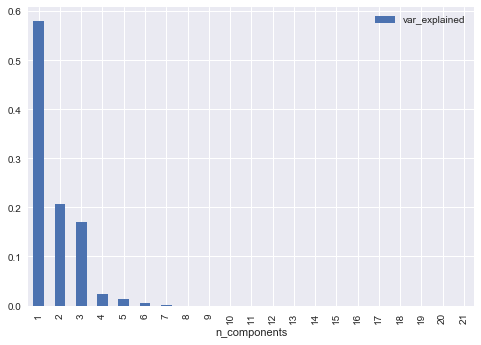

In [44]:
# Plot
pca_data.plot(kind='bar');